In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model

from functions import AdversarialAutoencoder, evaluate_methods

In [5]:
#Loading mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [5]:
#From tensorflow tutorial
#https://www.tensorflow.org/tutorials/generative/autoencoder
class Autoencoder(Model):
  def __init__(self, latent_dim, shape):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim
    self.shape = shape
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(tf.math.reduce_prod(shape).numpy(), activation='sigmoid'),
      layers.Reshape(shape)
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded


In [6]:
shape = x_test.shape[1:]
latent_dim = 2
autoencoder = Autoencoder(latent_dim, shape)

In [7]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [8]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0699 - val_loss: 0.0603
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0592 - val_loss: 0.0582
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0578 - val_loss: 0.0573
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0572 - val_loss: 0.0569
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0568 - val_loss: 0.0566
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0565 - val_loss: 0.0563
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0564 - val_loss: 0.0562
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0562 - val_loss: 0.0560
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0561 - val_loss: 0.0559
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.05

In [9]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

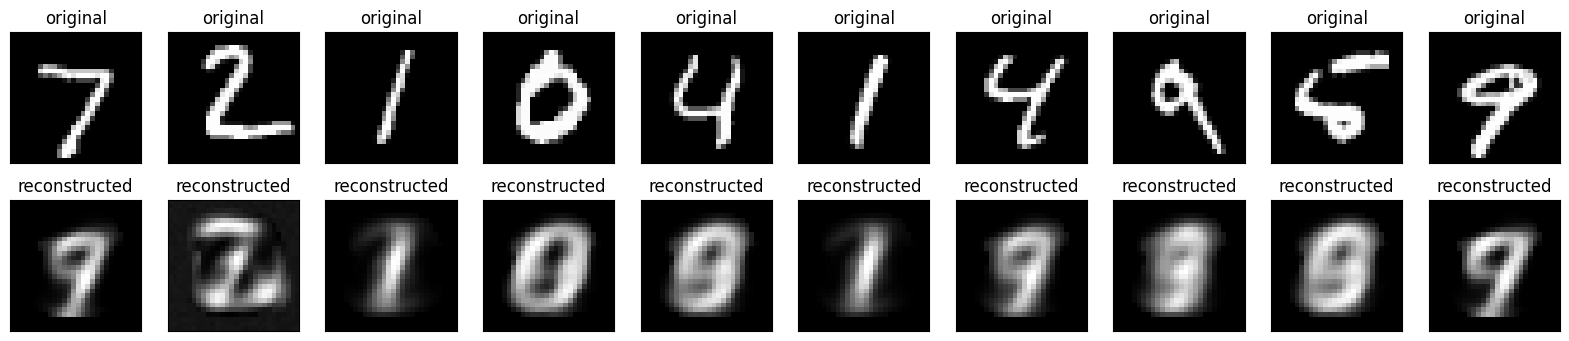

In [10]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

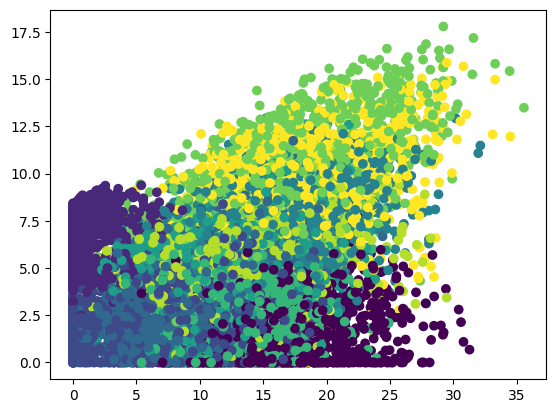

In [11]:
plt.scatter(encoded_imgs[:, 0], encoded_imgs[:, 1], c=y_test, cmap="viridis")

In [12]:
import functions

In [13]:
#Doing the same with the functions.py file
autoencoder3 = functions.train_autoencoder(x_train, x_test, latent_dim=3)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0654 - val_loss: 0.0549
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0540 - val_loss: 0.0529
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0527 - val_loss: 0.0521
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0521 - val_loss: 0.0517
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0519 - val_loss: 0.0515
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0517 - val_loss: 0.0514
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0516 - val_loss: 0.0513
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0515 - val_loss: 0.0512
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0514 - val_loss: 0.0512
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.051

In [14]:
encoded_imgs = autoencoder3.encoder(x_test).numpy()
decoded_imgs = autoencoder3.decoder(encoded_imgs).numpy()

In [15]:
#Run when functions file is updated
import importlib
importlib.reload(functions)

<module 'functions' from 'c:\\Users\\arons\\bda\\bda-project\\functions.py'>

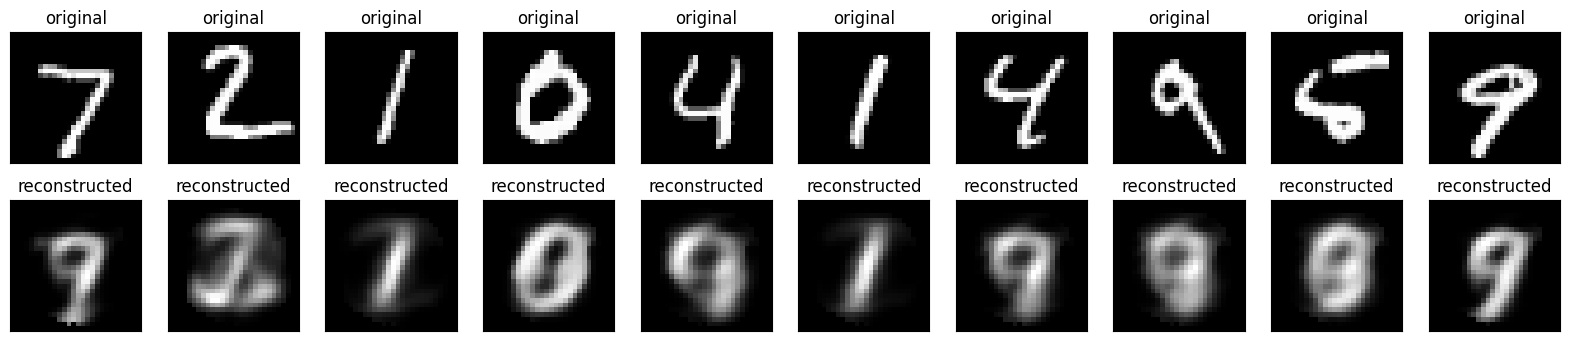

In [16]:
functions.plot_reconstruction(x_test, decoded_imgs)

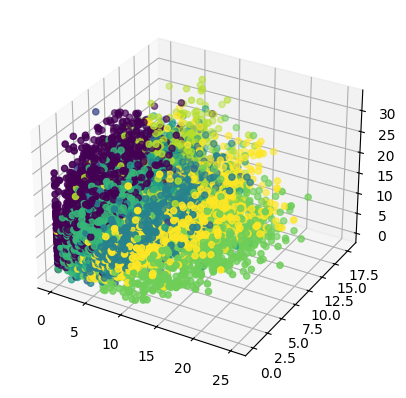

In [17]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(encoded_imgs[:, 0], encoded_imgs[:, 1],encoded_imgs[:, 2],  c=y_test, cmap="viridis")

In [18]:
#Toy example data inspired by
#https://www.researchgate.net/publication/331714929_Overview_of_spectral_dimensionality_reduction_and_application_to_social_network_embedding
#28x28 Pictures of vertical rectangles or horizontal rectangles (either 10x5 or 5x10)
np.random.seed(123)
labels = np.random.randint(0, 2, size=70000)

In [19]:
def generate_rectangle(label, size=28):
    rectangle = np.zeros((size, size))
    if label == 0:
        start_x = np.random.randint(0, 22)
        start_y = np.random.randint(0, 17)
        rectangle[start_y:start_y+10, start_x:start_x+5] = 1
    if label == 1:
        start_x = np.random.randint(0, 17)
        start_y = np.random.randint(0, 22)
        rectangle[start_y:start_y+5, start_x:start_x+10] = 1
    return rectangle

In [20]:
rectangles = np.array([generate_rectangle(i) for i in labels])

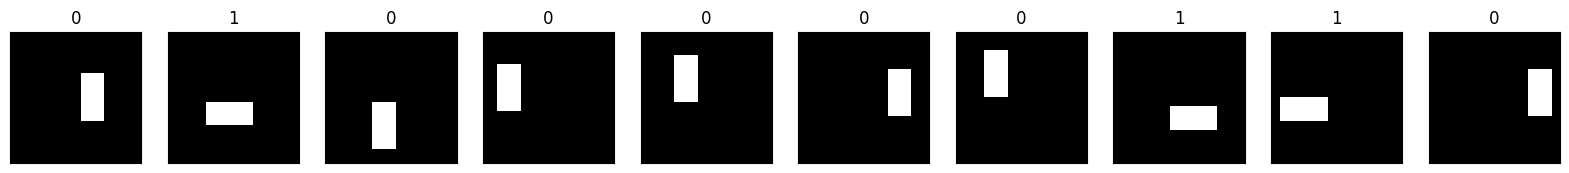

In [21]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(1, n, i + 1)
  plt.imshow(rectangles[i])
  plt.title(labels[i])
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

In [22]:
rectangles[60001:, ].shape

(9999, 28, 28)

In [23]:
autoencoder_rect = functions.train_autoencoder(rectangles[0:60000, ], rectangles[60001:, ], latent_dim=2)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0615 - val_loss: 0.0499
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0489 - val_loss: 0.0479
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0473 - val_loss: 0.0463
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0453 - val_loss: 0.0438
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0423 - val_loss: 0.0406
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0396 - val_loss: 0.0385
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0379 - val_loss: 0.0371
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0369 - val_loss: 0.0363
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0362 - val_loss: 0.0358
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.035

In [24]:
encoded_rect = autoencoder_rect.encoder(rectangles[60001:, ]).numpy()
decoded_rect = autoencoder_rect.decoder(encoded_rect).numpy()

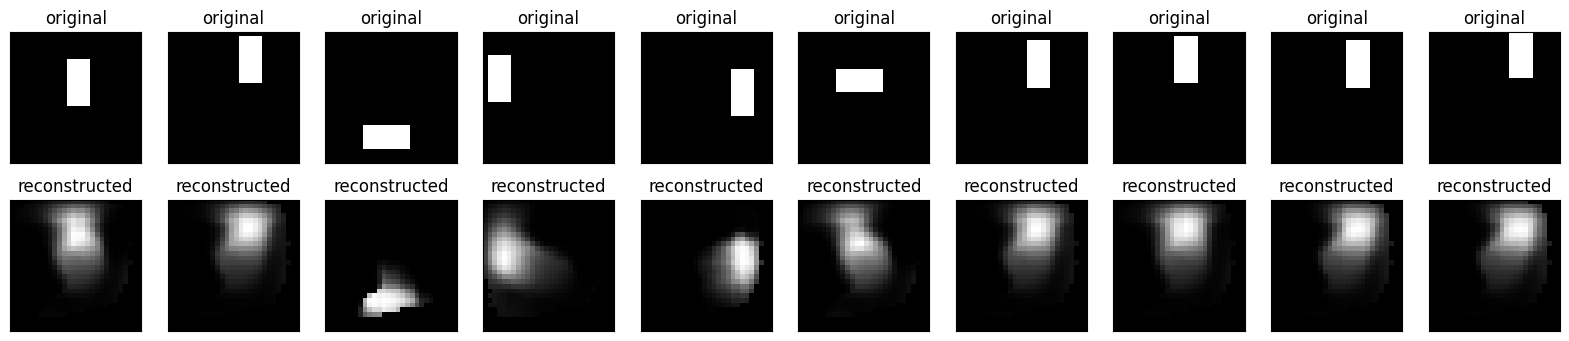

In [25]:
functions.plot_reconstruction(rectangles[60001:, ], decoded_rect)

In [26]:
print(encoded_rect[:, 0].shape)

(9999,)


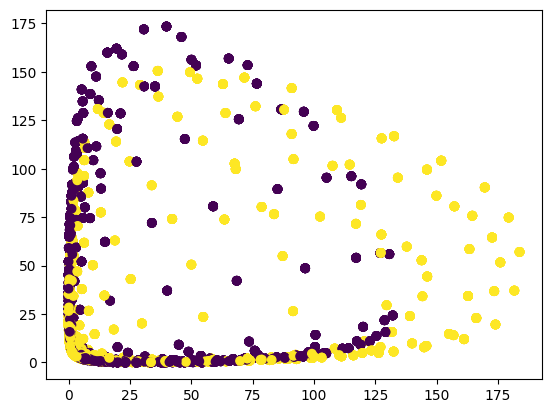

In [27]:
plt.scatter(encoded_rect[:, 0], encoded_rect[:, 1], c=labels[60001:], cmap="viridis")
plt.show()

In [28]:
autoencoder_rect3 = functions.train_autoencoder(rectangles[0:60000, ], rectangles[60001:, ], latent_dim=3)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0545 - val_loss: 0.0373
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0346 - val_loss: 0.0327
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0315 - val_loss: 0.0303
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0295 - val_loss: 0.0286
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0281 - val_loss: 0.0275
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0272 - val_loss: 0.0267
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0265 - val_loss: 0.0261
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0259 - val_loss: 0.0257
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0255 - val_loss: 0.0253
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.025

In [29]:
encoded_img, decoded_img = functions.get_reconstructed_img(autoencoder_rect3, rectangles[60001:, ])

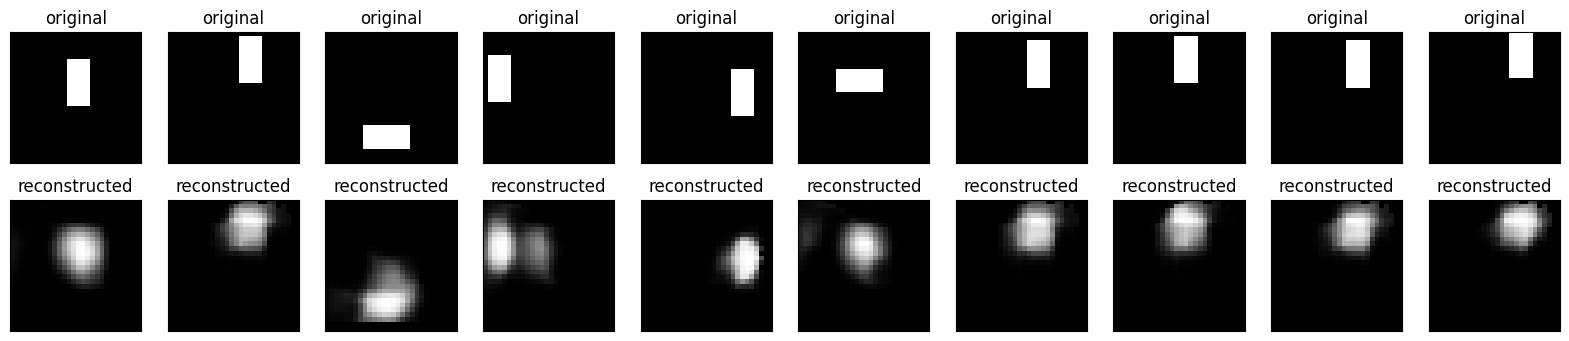

In [30]:
functions.plot_reconstruction(rectangles[60001:, ], decoded_img)

In [32]:
import plotly.express as px
import nbformat

In [33]:
fig = px.scatter_3d(x=encoded_img[:, 0], y=encoded_img[:, 1],z=encoded_img[:, 2], color=labels[60001:])
fig.show()

In [34]:
#For more intuition: 2D to 1D example
#Inspired by https://www.sciencedirect.com/science/article/pii/S0925231215017671?via%3Dihub

#Generate nonlinear curve
x_coord = 10*np.random.random_sample(size = 1000)-5
y_coord = np.tanh(x_coord)

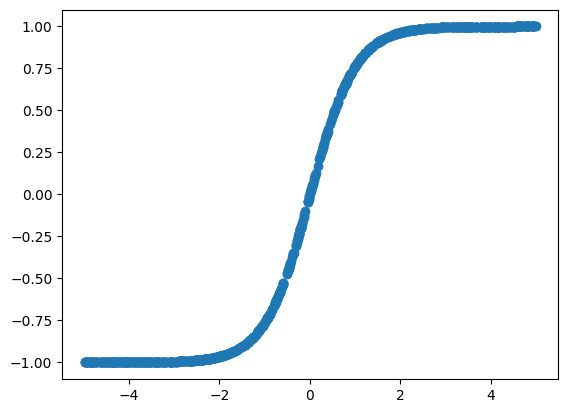

In [35]:
plt.scatter(x_coord, y_coord)
plt.show()

In [36]:
x = np.vstack((x_coord, y_coord)).T

In [37]:
autoencoder = functions.train_autoencoder(x[:799], x[800:], latent_dim=1)

Epoch 1/10
25/25 [==============================] - 1s 7ms/step - loss: 5.0892 - val_loss: 5.2299
Epoch 2/10
25/25 [==============================] - 0s 3ms/step - loss: 5.0632 - val_loss: 5.2033
Epoch 3/10
25/25 [==============================] - 0s 3ms/step - loss: 5.0359 - val_loss: 5.1755
Epoch 4/10
25/25 [==============================] - 0s 3ms/step - loss: 5.0077 - val_loss: 5.1457
Epoch 5/10
25/25 [==============================] - 0s 3ms/step - loss: 4.9777 - val_loss: 5.1149
Epoch 6/10
25/25 [==============================] - 0s 3ms/step - loss: 4.9465 - val_loss: 5.0824
Epoch 7/10
25/25 [==============================] - 0s 2ms/step - loss: 4.9139 - val_loss: 5.0488
Epoch 8/10
25/25 [==============================] - 0s 3ms/step - loss: 4.8808 - val_loss: 5.0141
Epoch 9/10
25/25 [==============================] - 0s 3ms/step - loss: 4.8472 - val_loss: 4.9794
Epoch 10/10
25/25 [==============================] - 0s 3ms/step - loss: 4.8144 - val_loss: 4.9448


In [38]:
coord_enc, reconstructed = functions.get_reconstructed_img(autoencoder, x[800:])

In [39]:
coord_enc[:, 0].shape

(200,)

In [40]:
df = pd.DataFrame({'x_coord' : x_coord[800:], 'y_coord' : y_coord[800:], 'encoded' : coord_enc[:, 0]})

In [41]:
#Encoding preserves order of coordinates
df = df.sort_values('x_coord')

In [42]:
df

,x_coord,y_coord,encoded
62,-4.980459,-0.999906,0.000000
94,-4.796599,-0.999864,0.000000
30,-4.772280,-0.999857,0.000000
77,-4.718279,-0.999841,0.000000
195,-4.604209,-0.999800,0.000000
...,...,...,...
19,4.833884,0.999873,1.472190
174,4.836633,0.999874,1.473805
181,4.936297,0.999897,1.532342
114,4.954753,0.999901,1.543182


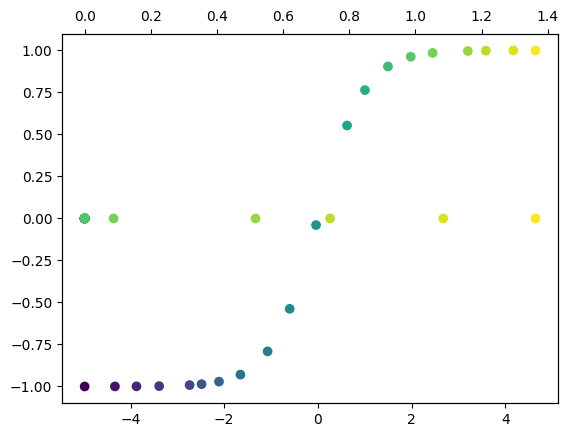

In [43]:
fig, ax1 = plt.subplots()

ax1.scatter(np.array(df['x_coord'])[::10], np.array(df['y_coord'])[::10], c=np.linspace(start=0, stop=1, num=20), cmap="viridis")

ax2 = ax1.twiny()
ax2.scatter(np.array(df['encoded'])[::10], [0]*20, c=np.linspace(start=0, stop=1, num=20), cmap="viridis")
plt.show()
#some values for x give rise to same encoded coordinate

In [54]:
from functions import AdversarialAutoencoder, evaluate_methods
latent_dim = 10
aae = AdversarialAutoencoder(latent_dim, shape=x_train.shape[1:])
aae.compile(
    ae_optimizer=tf.keras.optimizers.Adam(),
    d_optimizer=tf.keras.optimizers.Adam(),
    loss_fn=losses.MeanSquaredError()
)
aae.fit(x_train, epochs=10, batch_size=256)


Epoch 1/10
235/235 [==============================] - 2s 3ms/step - ae_loss: 0.0886 - d_loss: 0.2524
Epoch 2/10
235/235 [==============================] - 1s 3ms/step - ae_loss: 0.0521 - d_loss: 0.0164
Epoch 3/10
235/235 [==============================] - 1s 3ms/step - ae_loss: 0.0418 - d_loss: 0.0068
Epoch 4/10
235/235 [==============================] - 1s 2ms/step - ae_loss: 0.0379 - d_loss: 0.0040
Epoch 5/10
235/235 [==============================] - 1s 3ms/step - ae_loss: 0.0359 - d_loss: 0.0027
Epoch 6/10
235/235 [==============================] - 1s 2ms/step - ae_loss: 0.0347 - d_loss: 0.0020
Epoch 7/10
235/235 [==============================] - 1s 3ms/step - ae_loss: 0.0339 - d_loss: 0.0017
Epoch 8/10
235/235 [==============================] - 1s 3ms/step - ae_loss: 0.0334 - d_loss: 0.0016
Epoch 9/10
235/235 [==============================] - 1s 3ms/step - ae_loss: 0.0329 - d_loss: 0.0014
Epoch 10/10
235/235 [==============================] - 1s 3ms/step - ae_loss: 0.0325 - d_lo

In [55]:
encoded_imgs = aae.encoder(x_test).numpy()
decoded_imgs = aae.decoder(encoded_imgs).numpy()


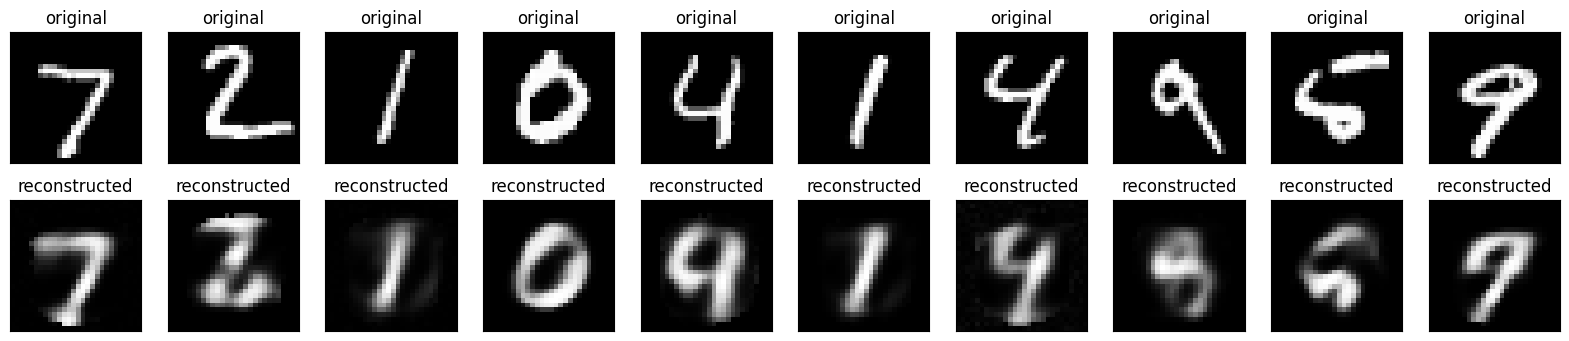

In [56]:
functions.plot_reconstruction(x_test, decoded_imgs, n=10)


In [6]:
from functions import AdversarialAutoencoder, evaluate_methods
import functions
results = functions.evaluate_methods(x_train, y_train, x_test, y_test, latent_dim=10)
for name, stats in results.items():
    print(f"{name}:")
    for k, v in stats.items():
        print(f"  {k}: {v}")



Epoch 1/10

1875/1875 [==============================] - 3s 1ms/step - loss: 0.0482 - val_loss: 0.0345
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0337 - val_loss: 0.0323
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0322 - val_loss: 0.0313
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0315 - val_loss: 0.0308
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0311 - val_loss: 0.0305
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0308 - val_loss: 0.0303
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0306 - val_loss: 0.0300
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0304 - val_loss: 0.0299
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0302 - val_loss: 0.0298
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.